In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from datetime import datetime, timedelta
from google.colab import drive
warnings.filterwarnings('ignore')



In [75]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:

orders = pd.read_csv("/content/drive/MyDrive/olist_orders_dataset.csv")
order_reviews = pd.read_csv("/content/drive/MyDrive/olist_order_reviews_dataset.csv")
customers = pd.read_csv("/content/drive/MyDrive/olist_customers_dataset.csv")
products = pd.read_csv("/content/drive/MyDrive/olist_products_dataset.csv")
order_items = pd.read_csv("/content/drive/MyDrive/olist_order_items_dataset.csv")



In [77]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [78]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [79]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [80]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [81]:
#handling missing data in the datases
if 'Order(s)' in orders:
  missing_orders = orders['Order(s)'].isnull().sum()
  orders['Order(s)'].fillna(0, inplace=True)

if 'Order_Review' in order_reviews:
  missingorder_review = order_reviews['Order_Review'].isnull.sum()
  order_reviews['Order_Review'].fillna(0, inplace=True)

if 'Customer(s)' in customers:
  missing_customers = customers['Customer(s)'].isnull().sum()
  customers['Customer(s)']

In [82]:
date_cols = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

for col in date_cols:
    if col in orders.columns:
        orders[col] = pd.to_datetime(orders[col], errors='coerce')
    else:
        print(f"⚠️ Warning: Column '{col}' not found in orders DataFrame")



In [83]:
if 'review_score' in order_reviews.columns:
    imp = SimpleImputer(strategy='median')
    order_reviews['review_score'] = imp.fit_transform(order_reviews[['review_score']])

In [84]:
#Schema Builder [merging customers, orders and reviews]
reviews_per_order = order_reviews.groupby('order_id').agg({
    'review_score': 'mean',
    'review_creation_date': 'max'
}).reset_index()

#Orders and Reviews
order_and_review = pd.merge(orders, reviews_per_order, on=['order_id'], how='inner')

#Orders, Reviews and Customers
overall = pd.merge(order_and_review, customers[['customer_id', 'customer_unique_id', 'customer_state', 'customer_city']], on=['customer_id'], how='left')



In [85]:
if order_items is not None and products is not None:
    order_cat = pd.merge(order_items[['order_id', 'product_id']],
                         products[['product_id', 'product_category_name']],
                         on='product_id', how='left')

In [86]:
if order_items is not None and products is not None:
    order_cat = pd.merge(order_items[['order_id', 'product_id']],
                         products[['product_id', 'product_category_name']],
                         on='product_id', how='left')
    order_cat = order_cat.groupby('order_id')['product_category_name'].agg(
      lambda x: x.mode()[0] if len(x.mode()) > 0 else 'unknown'
 ).reset_index()
    overall = pd.merge(overall, order_cat, on='order_id', how='left')
else:
    overall['product_category_name'] = 'unknown'

In [87]:
#Real Delay Calculator

overall['Days_Difference'] = (
    overall['order_delivered_customer_date'] -
    overall['order_estimated_delivery_date']
).dt.days

In [88]:
#Classification Status
overall['Delivery_Status'] = 'Unknown'

# Step 2: Flag non-delivered / problematic statuses first (highest priority)
non_delivered_statuses = ['canceled', 'cancelled', 'unavailable', 'invoiced', 'processing', 'shipped']

overall.loc[
    overall['order_status'].str.lower().isin(non_delivered_statuses) |
    overall['order_delivered_customer_date'].isna(),
    'Delivery_Status'
] = 'Not Delivered'

# Step 3: Only for rows that are actually delivered → classify based on days


delivered_mask = (
    (overall['Delivery_Status'] == 'Unknown') &                  # not yet classified
    overall['order_delivered_customer_date'].notna() &           # has real delivery date
    overall['order_estimated_delivery_date'].notna()             # has estimated date
)

# Now classify only the true delivered rows
overall.loc[delivered_mask & (overall['Days_Difference'] <= 0),   'Delivery_Status'] = 'On Time'
overall.loc[delivered_mask & (overall['Days_Difference'] > 0) &
                         (overall['Days_Difference'] <= 5),      'Delivery_Status'] = 'Late'
overall.loc[delivered_mask & (overall['Days_Difference'] > 5),    'Delivery_Status'] = 'Super Late'


still_unknown_but_has_date = (
    (overall['Delivery_Status'] == 'Unknown') &
    overall['order_delivered_customer_date'].notna()
)
if still_unknown_but_has_date.any():
    overall.loc[still_unknown_but_has_date, 'Delivery_Status'] = 'Unknown (Date Mismatch)'


#Validation
print("\nDelivery Status distribution:")
print(overall['Delivery_Status'].value_counts(dropna=False))

print("\nCross-check with order_status:")
print(pd.crosstab(overall['order_status'], overall['Delivery_Status'], margins=True))

print("\nSample of 'Not Delivered' rows:")
print(overall[overall['Delivery_Status'] == 'Not Delivered'][
    ['order_id', 'order_status', 'order_delivered_customer_date', 'Days_Difference']
].head(6))


Delivery Status distribution:
Delivery_Status
On Time          89443
Super Late        3659
Not Delivered     2849
Late              2722
Name: count, dtype: int64

Cross-check with order_status:
Delivery_Status  Late  Not Delivered  On Time  Super Late    All
order_status                                                    
approved            0              2        0           0      2
canceled            0            605        0           0    605
created             0              3        0           0      3
delivered        2722              8    89443        3659  95832
invoiced            0            309        0           0    309
processing          0            295        0           0    295
shipped             0           1032        0           0   1032
unavailable         0            595        0           0    595
All              2722           2849    89443        3659  98673

Sample of 'Not Delivered' rows:
                             order_id order_status  \
6

In [89]:
est = overall['order_estimated_delivery_date']
overall['Year']      = est.dt.year
overall['Month']     = est.dt.month
overall['Quarter']   = est.dt.quarter
overall['DayofWeek'] = est.dt.dayofweek
overall['DayName']   = est.dt.day_name()
overall['MonthName'] = est.dt.month_name()


Late delivery % by state (top 8):
customer_state
AL    20.81
MA    17.13
SE    14.97
PI    13.80
CE    13.67
RR    12.20
RJ    11.92
BA    11.89
dtype: float64


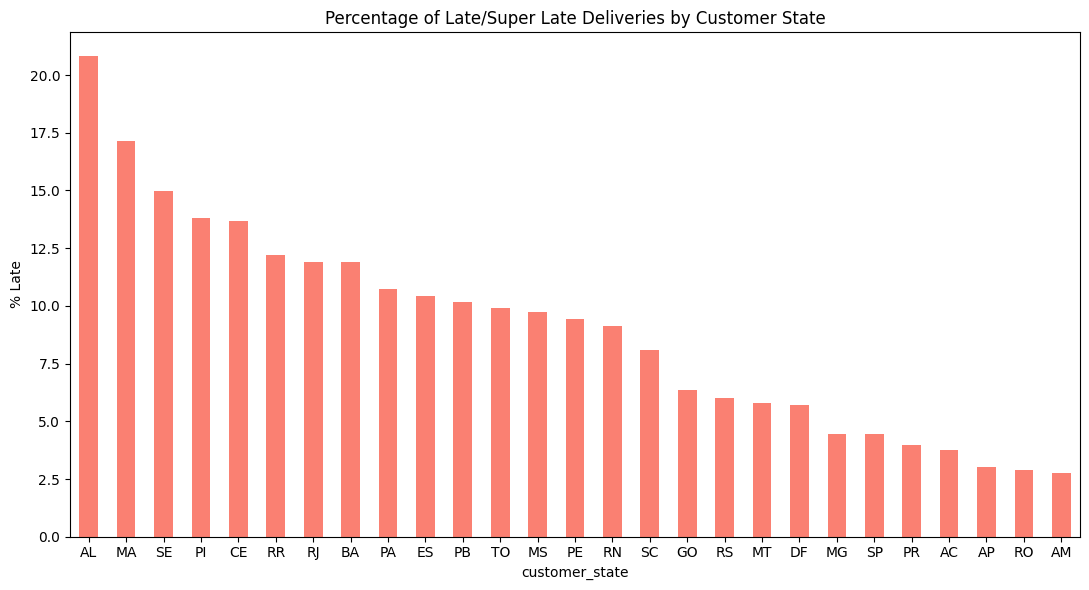

In [102]:
#Geographic Analysis
delivered = overall[overall['Delivery_Status'] != 'Not Delivered']
late = delivered[delivered['Delivery_Status'].isin(['Late', 'Super Late'])]

state_late_pct = (late.groupby('customer_state').size() /
                  delivered.groupby('customer_state').size() * 100).round(2)

state_late_pct = state_late_pct.sort_values(ascending=False)

print("\nLate delivery % by state (top 8):")
print(state_late_pct.head(8))

plt.figure(figsize=(11,6))
state_late_pct.plot(kind='bar', color='salmon')
plt.title('Percentage of Late/Super Late Deliveries by Customer State')
plt.ylabel('% Late')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



Average review score by delivery status:
Delivery_Status
Late          2.99
On Time       4.29
Super Late    1.74
Name: review_score, dtype: float64


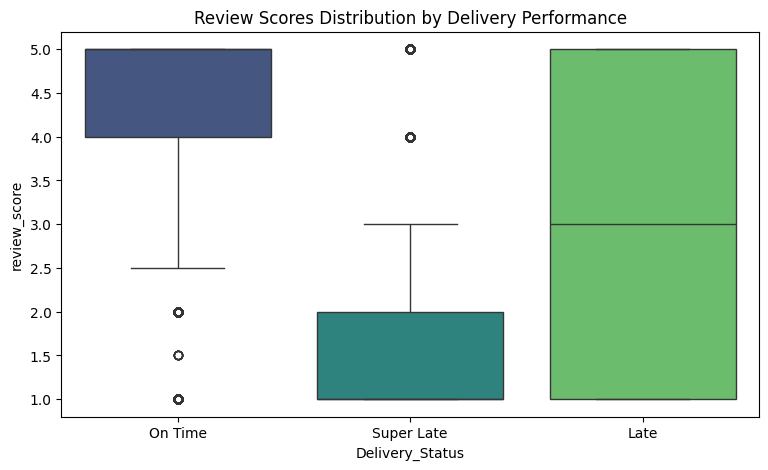

In [103]:
#Sentiment Correlation

valid = overall[(overall['review_score'].notna()) &
               (overall['Delivery_Status'] != 'Not Delivered')]

print("\nAverage review score by delivery status:")
print(valid.groupby('Delivery_Status')['review_score'].mean().round(2))

plt.figure(figsize=(9,5))
sns.boxplot(data=valid, x='Delivery_Status', y='review_score', palette='viridis')
plt.title('Review Scores Distribution by Delivery Performance')
plt.show()


In [92]:
overall.to_csv("/content/drive/MyDrive/master_logistic_audit.csv", index=False)
print("\nSaved master_logistic_audit.csv to Drive")
print("Ready for Gradio ")


Saved master_logistic_audit.csv to Drive
Ready for Gradio 
